k = 4
mean[3.0, 11.0, 18.666666666666668, 27.8]
cluster 0: [2, 3, 4]
cluster 1: [10, 11, 12]
cluster 2: [18, 18, 20]
cluster 3: [24, 25, 30, 30, 30]


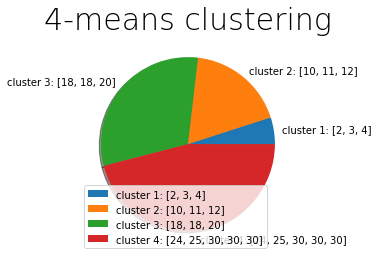

In [2]:
import random
import matplotlib.pyplot as plt

MAX = 10000000000

array = [2, 3, 4, 10, 11, 12, 18, 18, 20, 24, 25, 30, 30, 30]
k = 4

mean = list(random.randint(min(array), max(array)) for i in range(k))


def findMean(cluster):
    if len(cluster) == 0:
        return 0
    return sum(cluster) / len(cluster)


def distance(value1, value2):
    return abs(value1 - value2)


def process():
    cluster = [[] for i in range(k)]
    mean.sort()
    for i in array:
        temp = MAX
        itr = 0
        for j in range(len(mean)):
            if distance(i, mean[j]) < temp:
                itr = j
                temp = distance(i, mean[j])
        cluster[itr].append(i)
    return cluster


def checkMeanEqual():
    for i in range(len(mean) - 1):
        if mean[i] != mean[i + 1]:
            return False
    return True


def checkMeanRepeat(cluster):
    global mean
    temp_mean = list()

    for i in cluster:
        temp_mean.append(findMean(i))

    mean.sort()
    temp_mean.sort()

    if mean != temp_mean:
        mean = temp_mean
        return False
    return True


def drawGraph():
    for i in range(len(clusterList)):
        clusterList[i] = f'cluster {i + 1}: {clusterList[i]}'

    plt.pie(mean, labels=clusterList, shadow=True)
    plt.legend()
    plt.title(f"{k}-means clustering", fontweight=30, fontsize=30)
    plt.show()


while True:
    clusterList = process()
    if checkMeanEqual() is True or checkMeanRepeat(clusterList) is True:
        break

print(f'k = {k}')
print(f'mean{mean}')
j = 0
for i in clusterList:
    print(f'cluster {j}: {i}')
    j += 1


drawGraph()